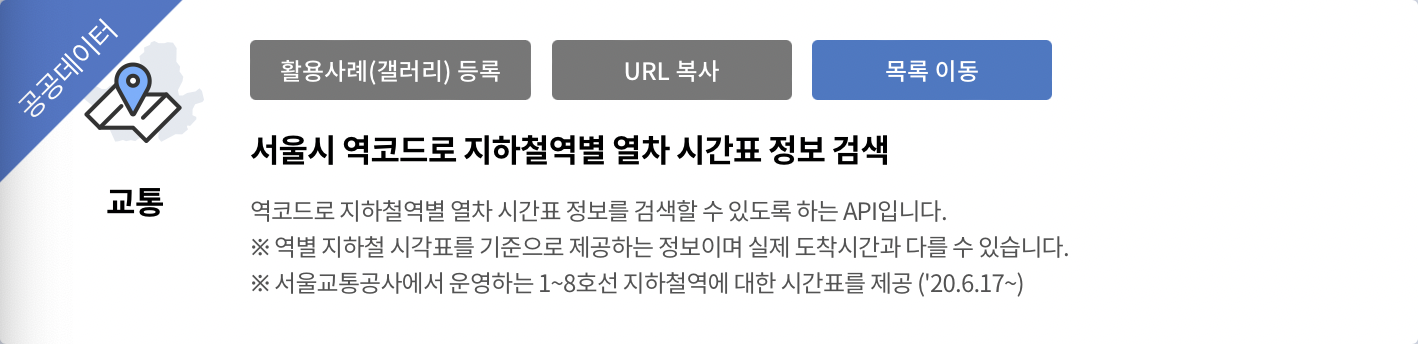

In [ ]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
from bs4 import BeautifulSoup

https://data.seoul.go.kr/dataList/OA-101/A/1/datasetView.do

In [ ]:
url_jamsil = "http://openAPI.seoul.go.kr:8088/ your API key /xml/SearchSTNTimeTableByIDService/1/1000/0216/1/1/"

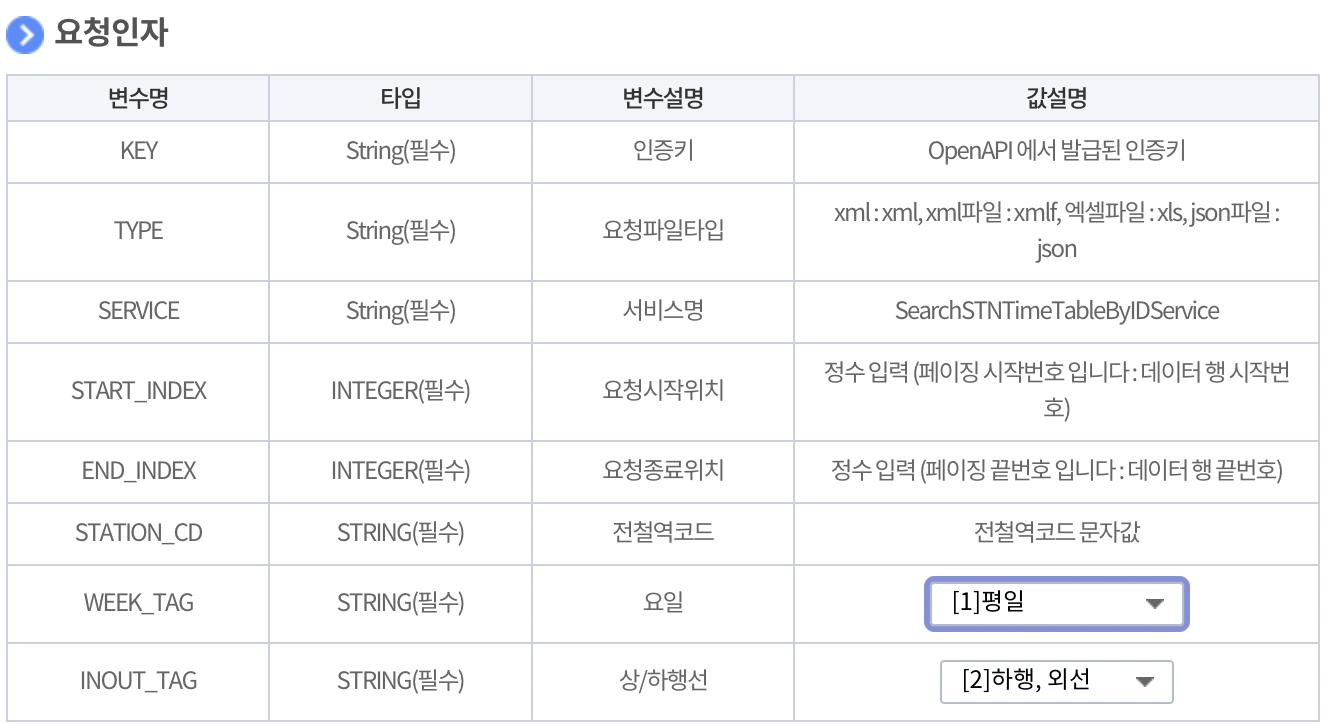

http://openAPI.seoul.go.kr:8088/  
\+ your API key  
\+ xml[xmlf, xls, json]  
\+ SearchSTNTimeTableByIDService  
\+ Start_idx 시작 페이지
\+ End_dix 종료 페이지  
\+ station_code 전철역 코드넘버  
\+ week_tag 요일 (1:평일, 2:토요일, 3:휴일&일요일)  
\+ inout_tag 상[하]향손 (1:상행, 2:하행)   

# 잠실역

In [ ]:
response = requests.get(url_jamsil)
response

<Response [200]>

In [ ]:
response.status_code

200

In [ ]:
jamsil_data = BeautifulSoup(response.content, 'xml')

In [ ]:
len(jamsil_data), jamsil_data

(1,
 <?xml version="1.0" encoding="utf-8"?>
 <SearchSTNTimeTableByIDService>
 <list_total_count>240</list_total_count>
 <RESULT>
 <CODE>INFO-000</CODE>
 <MESSAGE>정상 처리되었습니다</MESSAGE>
 </RESULT>
 <row>
 <LINE_NUM>02호선</LINE_NUM>
 <FR_CODE>216</FR_CODE>
 <STATION_CD>0216</STATION_CD>
 <STATION_NM>잠실</STATION_NM>
 <TRAIN_NO>2022</TRAIN_NO>
 <ARRIVETIME>05:40:00</ARRIVETIME>
 <LEFTTIME>05:40:30</LEFTTIME>
 <ORIGINSTATION>0211</ORIGINSTATION>
 <DESTSTATION>0211</DESTSTATION>
 <SUBWAYSNAME>성수</SUBWAYSNAME>
 <SUBWAYENAME>성수</SUBWAYENAME>
 <WEEK_TAG>1</WEEK_TAG>
 <INOUT_TAG>1</INOUT_TAG>
 <FL_FLAG/>
 <DESTSTATION2/>
 <EXPRESS_YN>G</EXPRESS_YN>
 <BRANCH_LINE/>
 </row>
 <row>
 <LINE_NUM>02호선</LINE_NUM>
 <FR_CODE>216</FR_CODE>
 <STATION_CD>0216</STATION_CD>
 <STATION_NM>잠실</STATION_NM>
 <TRAIN_NO>2026</TRAIN_NO>
 <ARRIVETIME>05:50:00</ARRIVETIME>
 <LEFTTIME>05:50:30</LEFTTIME>
 <ORIGINSTATION>0211</ORIGINSTATION>
 <DESTSTATION>0211</DESTSTATION>
 <SUBWAYSNAME>성수</SUBWAYSNAME>
 <SUBWAYENAME>성수</SU

In [ ]:
jamsil_data.text

'\n240\n\nINFO-000\n정상 처리되었습니다\n\n\n02호선\n216\n0216\n잠실\n2022\n05:40:00\n05:40:30\n0211\n0211\n성수\n성수\n1\n1\n\n\nG\n\n\n\n02호선\n216\n0216\n잠실\n2026\n05:50:00\n05:50:30\n0211\n0211\n성수\n성수\n1\n1\n\n\nG\n\n\n\n02호선\n216\n0216\n잠실\n2028\n05:57:00\n05:57:30\n0211\n0211\n성수\n성수\n1\n1\n\n\nG\n\n\n\n02호선\n216\n0216\n잠실\n2030\n06:04:00\n06:04:30\n0211\n0211\n성수\n성수\n1\n1\n\n\nG\n\n\n\n02호선\n216\n0216\n잠실\n2032\n06:08:00\n06:08:30\n0211\n0211\n성수\n성수\n1\n1\n\n\nG\n\n\n\n02호선\n216\n0216\n잠실\n2036\n06:14:00\n06:14:30\n0211\n0211\n성수\n성수\n1\n1\n\n\nG\n\n\n\n02호선\n216\n0216\n잠실\n2038\n06:20:00\n06:20:30\n0211\n0211\n성수\n성수\n1\n1\n\n\nG\n\n\n\n02호선\n216\n0216\n잠실\n2042\n06:27:00\n06:27:30\n0211\n0211\n성수\n성수\n1\n1\n\n\nG\n\n\n\n02호선\n216\n0216\n잠실\n2044\n06:33:00\n06:33:30\n0211\n0211\n성수\n성수\n1\n1\n\n\nG\n\n\n\n02호선\n216\n0216\n잠실\n2046\n06:37:00\n06:37:30\n0211\n0211\n성수\n성수\n1\n1\n\n\nG\n\n\n\n02호선\n216\n0216\n잠실\n2048\n06:40:00\n06:40:30\n0211\n0211\n성수\n성수\n1\n1\n\n\nG\n\n\n\n02호선\n216\n0216\n잠

In [ ]:
jamsil_data.find_all('LINE_NUM')[:5]

[<LINE_NUM>02호선</LINE_NUM>,
 <LINE_NUM>02호선</LINE_NUM>,
 <LINE_NUM>02호선</LINE_NUM>,
 <LINE_NUM>02호선</LINE_NUM>,
 <LINE_NUM>02호선</LINE_NUM>]

In [ ]:
jamsil_data.find_all('LINE_NUM')[0].text

'02호선'

In [ ]:
len(jamsil_data.find_all('LINE_NUM'))

240

In [ ]:
# 필요한 정보를 추출하여 저장할 리스트 생성
subway_data = []

# <row> 요소를 순회하며 필요한 정보 추출
for i in range(len(jamsil_data.find_all('LINE_NUM'))):
    line_num = jamsil_data.find_all("LINE_NUM")[i].text
    fr_code = jamsil_data.find_all("FR_CODE")[i].text
    station_cd = jamsil_data.find_all("STATION_CD")[i].text
    station_nm = jamsil_data.find_all("STATION_NM")[i].text
    train_no = jamsil_data.find_all("TRAIN_NO")[i].text
    arrival_time = jamsil_data.find_all("ARRIVETIME")[i].text
    left_time = jamsil_data.find_all("LEFTTIME")[i].text
    origin_station = jamsil_data.find_all("ORIGINSTATION")[i].text
    dest_station = jamsil_data.find_all("DESTSTATION")[i].text
    subway_sname = jamsil_data.find_all("SUBWAYSNAME")[i].text
    subway_ename = jamsil_data.find_all("SUBWAYENAME")[i].text
    week_tag = jamsil_data.find_all("WEEK_TAG")[i].text
    inout_tag = jamsil_data.find_all("INOUT_TAG")[i].text
    fl_flag = jamsil_data.find_all("FL_FLAG")[i].text
    dest_station2 = jamsil_data.find_all("DESTSTATION2")[i].text
    express_yn = jamsil_data.find_all("EXPRESS_YN")[i].text
    branch_line = jamsil_data.find_all("BRANCH_LINE")[i].text

    # 필요한 정보를 딕셔너리 형태로 저장
    subway_info = {
        "line_num": line_num,
        "fr_code": fr_code,
        "station_cd": station_cd,
        "station_nm": station_nm,
        "train_no": train_no,
        "arrival_time": arrival_time,
        "left_time": left_time,
        "origin_station": origin_station,
        "dest_station": dest_station,
        "subway_sname": subway_sname,
        "subway_ename": subway_ename,
        "week_tag": week_tag,
        "inout_tag": inout_tag,
        "fl_flag": fl_flag,
        "dest_station2": dest_station2,
        "express_yn": express_yn,
        "branch_line": branch_line
    }

    subway_data.append(subway_info)

In [ ]:
len(subway_data), subway_data[0]

(240,
 {'line_num': '02호선',
  'fr_code': '216',
  'station_cd': '0216',
  'station_nm': '잠실',
  'train_no': '2022',
  'arrival_time': '05:40:00',
  'left_time': '05:40:30',
  'origin_station': '0211',
  'dest_station': '0211',
  'subway_sname': '성수',
  'subway_ename': '성수',
  'week_tag': '1',
  'inout_tag': '1',
  'fl_flag': '',
  'dest_station2': '',
  'express_yn': 'G',
  'branch_line': ''})

In [ ]:
jamsil_df = pd.DataFrame(subway_data)
jamsil_df

,line_num,fr_code,station_cd,station_nm,train_no,arrival_time,left_time,origin_station,dest_station,subway_sname,subway_ename,week_tag,inout_tag,fl_flag,dest_station2,express_yn,branch_line
0,02호선,216,0216,잠실,2022,05:40:00,05:40:30,0211,0211,성수,성수,1,1,,,G,
1,02호선,216,0216,잠실,2026,05:50:00,05:50:30,0211,0211,성수,성수,1,1,,,G,
2,02호선,216,0216,잠실,2028,05:57:00,05:57:30,0211,0211,성수,성수,1,1,,,G,
3,02호선,216,0216,잠실,2030,06:04:00,06:04:30,0211,0211,성수,성수,1,1,,,G,
4,02호선,216,0216,잠실,2032,06:08:00,06:08:30,0211,0211,성수,성수,1,1,,,G,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,02호선,216,0216,잠실,2512,23:57:00,23:57:30,0211,0202,성수,을지로입구,1,1,,,G,
236,02호선,216,0216,잠실,2514,24:09:00,24:09:30,0211,0239,성수,홍대입구,1,1,,,G,
237,02호선,216,0216,잠실,2516,24:21:00,24:21:30,0211,0234,성수,신도림,1,1,,,G,
238,02호선,216,0216,잠실,2518,24:34:00,24:34:30,0211,0228,성수,서울대입구,1,1,,,G,
